2023/12
## skku DataMining project : 
## 서울 대중교통 혼잡도 및 중심성 그래프분석(Seoul_transportation_GraphMining)
contributer : 김민, 김효원, 이수정, 조병웅  
instruction :   
블로거 GD park manger님의 대중교통 분석 연구를 바탕으로, 서울시 대중교통 네트워크의 중심성을 살펴보고,
사용목적 대비 유동인구 수라는 혼잡도 개념을 추가하여 새로 발전된 인사이트를 제공함을 목적으로 함.
참고한 분석 연구의 주소 -> https://m.blog.naver.com/gdpresent/221147909255

## graph_subway 파일 정보
contributer : 조병웅, 김효원
신림 빅데이터 거래소에서 얻은 데이터와 위도 데이터를 통해 지하철 그래프의 노드와 엣지를 구하는 과정


## 라이브러리 및 데이터 로딩
역 정보 데이터 출처: https://www.bigdata-forest.kr/product/PTP002701<br>
경위도 데이터 출처: https://blog.naver.com/yug311861/221970210014

In [1]:
# 한글 폰트 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from IPython.display import clear_output
clear_output()

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [3]:
data1 = pd.read_csv('../데이터/로데이터/PTP002701.csv')
data2 = pd.read_excel('../데이터/로데이터/지하철노선위경도정보.xlsx')

## 데이터 프레임 확인 및 데이터 정리

In [4]:
df = data1[['LaneNo', 'StationID', 'NextID', 'NameKor']]
print(df.shape)
df.head()

(1477, 4)


,LaneNo,StationID,NextID,NameKor
0,2,201,202,시청
1,2,202,203,을지로입구
2,2,203,204,을지로3가
3,2,204,205,을지로4가
4,2,205,206,동대문역사문화공원


In [5]:
id_dict = dict(zip(list(df.StationID), list(df.NameKor)))
print(id_dict)

{201: '시청', 202: '을지로입구', 203: '을지로3가', 204: '을지로4가', 205: '동대문역사문화공원', 206: '신당', 207: '상왕십리', 208: '왕십리', 209: '한양대', 210: '뚝섬', 211: '성수', 212: '건대입구', 213: '구의', 214: '강변', 215: '잠실나루', 216: '잠실', 217: '잠실새내', 218: '종합운동장', 219: '삼성', 220: '선릉', 221: '역삼', 222: '강남', 223: '교대', 224: '서초', 225: '방배', 226: '사당', 227: '낙성대', 228: '서울대입구', 229: '봉천', 230: '신림', 231: '신대방', 232: '구로디지털단지', 233: '대림', 234: '신도림', 235: '문래', 236: '영등포구청', 237: '당산', 238: '합정', 239: '홍대입구', 240: '신촌', 241: '이대', 242: '아현', 243: '충정로', 310: '대화', 311: '주엽', 312: '정발산', 313: '마두', 314: '백석', 315: '대곡', 316: '화정', 317: '원당', 370: '원흥', 318: '삼송', 319: '지축', 320: '구파발', 321: '연신내', 322: '불광', 323: '녹번', 324: '홍제', 325: '무악재', 326: '독립문', 327: '경복궁', 328: '안국', 329: '종로3가', 330: '을지로3가', 331: '충무로', 332: '동대입구', 333: '약수', 334: '금호', 335: '옥수', 336: '압구정', 337: '신사', 338: '잠원', 339: '고속터미널', 340: '교대', 341: '남부터미널', 342: '양재', 343: '매봉', 344: '도곡', 345: '대치', 346: '학여울', 347: '대청', 348: '일원', 349: '수서', 350: '가

In [6]:
nextName = [id_dict[i] for i in df.NextID]
print(nextName)

['을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원', '신당', '상왕십리', '왕십리', '한양대', '뚝섬', '성수', '건대입구', '구의', '강변', '잠실나루', '잠실', '잠실새내', '종합운동장', '삼성', '선릉', '역삼', '강남', '교대', '서초', '방배', '사당', '낙성대', '서울대입구', '봉천', '신림', '신대방', '구로디지털단지', '대림', '신도림', '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로', '시청', '시청', '주엽', '정발산', '마두', '백석', '대곡', '화정', '원당', '원흥', '삼송', '지축', '구파발', '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁', '안국', '종로3가', '을지로3가', '충무로', '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널', '교대', '남부터미널', '양재', '매봉', '도곡', '대치', '학여울', '대청', '일원', '수서', '가락시장', '경찰병원', '오금', '오금', '상계', '노원', '창동', '쌍문', '수유(강북구청)', '미아', '미아사거리', '길음', '성신여대입구', '한성대입구', '혜화', '동대문', '동대문역사문화공원', '충무로', '명동', '회현', '서울역', '숙대입구', '삼각지', '신용산', '이촌', '동작', '총신대입구(이수)', '사당', '남태령', '선바위', '경마공원', '대공원', '과천', '정부과천청사', '인덕원', '평촌', '범계', '금정', '산본', '수리산', '대야미', '반월', '상록수', '한대앞', '중앙', '고잔', '초지', '안산', '신길온천', '정왕', '오이도', '오이도', '개화산', '김포공항', '송정', '마곡', '발산', '우장산', '화곡', '까치산', '신정

In [7]:
df['NextName'] = nextName
df.drop(['StationID', 'NextID'], axis=1, inplace=True)
df = df.drop_duplicates()
df.head()

,LaneNo,NameKor,NextName
0,2,시청,을지로입구
1,2,을지로입구,을지로3가
2,2,을지로3가,을지로4가
3,2,을지로4가,동대문역사문화공원
4,2,동대문역사문화공원,신당


## 데이터 전처리

In [8]:
# 호선을 만드는 함수
def getLine(num, start, end, second=None):
    way = df[df['LaneNo']==num]
    subwayList = []

    if second:
        next = way[way['NameKor']==start][way['NextName']==second]
        subwayList.append(next.index[0])
        start = second

    while True:
        next = way[way['NameKor']==start]
        idx = next.index[0]
        subwayList.append(idx)
        name = next.NextName[idx]
        if name == end:
            break
        start = name

    return subwayList

In [9]:
line1 = getLine(1, '덕정', '구로') + getLine(1, '구로', '송내', '구일') + getLine(1, '구로', '군포', '가산디지털단지')
line2 = getLine(2, '성수', '신도림') + getLine(2, '성수', '신설동', '용답') + getLine(2, '신도림', '까치산', '도림천') + getLine(2, '신도림', '뚝섬', '문래')
line3 = getLine(3, '대화', '오금')
line4 = getLine(4, '당고개', '수리산')
line5 = getLine(5, '방화', '강동') + getLine(5, '강동', '마천', '둔촌동') + getLine(5, '강동', '상일동', '길동') #상일동-하남검단산
line6 = getLine(6, '응암', '응암', '역촌') + getLine(6, '응암', '봉화산(서울의료원)', '새절') #봉화산(서울의료원)-신내
line7 = getLine(7, '장암', '춘의')
line8 = getLine(8, '암사', '모란')
line9 = getLine(9, '중앙보훈병원', '개화', '둔촌오륜')

line10 = getLine(101, '서울역', '김포공항') # 공항철도
line11 = getLine(100, '왕십리', '모란') # 분당선
line12 = getLine(108, '청량리', '신내') # 경춘선 / 상봉-광운대
line13 = getLine(104, '대곡', '가좌') + getLine(104, '가좌', '서울역', '신촌') + getLine(104, '가좌', '양원', '홍대입구') # 경의중앙선
line14 = getLine(109, '강남', '청계산입구') # 신분당선
line15 = getLine(113, '신설동', '북한산우이') # 우이신설

In [10]:
route = df.loc[line1 + line2 + line3 + line4 + line5 + line6 + line7 + line8 + line9 + line10 + line11 + line12 + line13 + line14 + line15]
route.reset_index(drop=True, inplace=True)
print('누락 노선 추가 전:', len(route))

# 누락 노선 목록
addLine = [
    # [5, '상일동', '강일'], [5, '강일', '미사'], [5, '미사', '하남풍산'], [5, '하남풍산', '하남시청'], [5, '하남시청', '하남검단산'],
    [6, '봉화산(서울의료원)', '신내'],
    [108, '광운대', '상봉']
]

# 누락 노선 추가
for add in addLine:
    route = route.append(pd.Series(add, index=route.columns), ignore_index=True)

# 특수문자 제거
route = route.replace('수유(강북구청)', '수유')
route = route.replace('총신대입구(이수)', '총신대입구')
route = route.replace('녹사평(용산구청)', '녹사평')
route = route.replace('봉화산(서울의료원)', '봉화산')

route = route.drop_duplicates()
route = route.sort_values(by=['LaneNo'])
route.reset_index(drop=True, inplace=True)
print('누락 노선 추가 후:', len(route))

# 단어 '역' 추가
route = pd.concat([route[['LaneNo']], route[['NameKor', 'NextName']].applymap(lambda x: x+'역')], axis=1)
route = route.replace('대구역역', '대구역')
route = route.replace('대전역역', '대전역')
route = route.replace('동대구역역', '동대구역')
route = route.replace('부산역역', '부산역')
route = route.replace('서울역역', '서울역')

route

누락 노선 추가 전: 434
누락 노선 추가 후: 436


,LaneNo,NameKor,NextName
0,1,덕정역,덕계역
1,1,남영역,용산역
2,1,용산역,노량진역
3,1,노량진역,대방역
4,1,대방역,신길역
...,...,...,...
431,113,화계역,가오리역
432,113,가오리역,4.19민주묘지역
433,113,4.19민주묘지역,솔밭공원역
434,113,솔밭공원역,북한산우이역


In [11]:
# 향후 데이터 처리에서 지역 정보를 넣기 위해 위도 및 경도 넣기
data2.drop_duplicates(subset='역이름', inplace=True)
data2 = data2[['역이름', 'Unnamed: 3', 'Unnamed: 2']]
data2.columns = ['name', 'X', 'Y']
data2 = data2.replace('4·19민주묘지역', '4.19민주묘지역')
data2

,name,X,Y
0,낙성대역,126.963506,37.477090
1,구룡역,127.059475,37.487027
2,서울대입구역,126.952695,37.481285
3,불광역,126.930302,37.610044
4,월롱역,126.792563,37.796204
...,...,...,...
968,유성온천역,127.341424,36.353717
970,현충원역,127.321793,36.359070
972,노은역,127.317866,36.374130
973,지족역,127.319489,36.384093


In [12]:
names = sorted(list(set(list(route.NameKor) + list(route.NextName))))
ids = [i for i in range(1, len(names)+1)]
id_name = ['%d_%s'%(i+1,names[i]) for i in range(len(names))]

node = pd.DataFrame({'title':id_name, 'ARS_ID': ids, 'name': names})
node = pd.merge(left=node, right=data2, how='left', on='name')
node

,title,ARS_ID,name,X,Y
0,1_4.19민주묘지역,1,4.19민주묘지역,127.013689,37.649527
1,2_가능역,2,가능역,127.044275,37.748393
2,3_가락시장역,3,가락시장역,127.118258,37.493092
3,4_가산디지털단지역,4,가산디지털단지역,126.882644,37.480389
4,5_가양역,5,가양역,126.854402,37.561429
...,...,...,...,...,...
352,353_회기역,353,회기역,127.058039,37.589778
353,354_회룡역,354,회룡역,127.047277,37.723795
354,355_회현역,355,회현역,126.978428,37.558760
355,356_효창공원앞역,356,효창공원앞역,126.961394,37.539294


In [13]:
title_dict = dict(zip(list(node.name), list(node.title)))

source = [title_dict[i] for i in route.NameKor]
target = [title_dict[i] for i in route.NextName]

edge = pd.DataFrame({'LaneNo': route.LaneNo, 'source': source, 'target': target})
edge

,LaneNo,source,target
0,1,90_덕정역,89_덕계역
1,1,63_남영역,272_용산역
2,1,272_용산역,68_노량진역
3,1,68_노량진역,84_대방역
4,1,84_대방역,210_신길역
...,...,...,...
431,113,348_화계역,6_가오리역
432,113,6_가오리역,1_4.19민주묘지역
433,113,1_4.19민주묘지역,194_솔밭공원역
434,113,194_솔밭공원역,153_북한산우이역


In [14]:
node['title'] = node['title'].str.replace(' ', '')
node['name'] = node['name'].str.replace(' ', '')
edge['source'] = edge['source'].str.replace(' ', '')
edge['target'] = edge['target'].str.replace(' ', '')

## 그래프 시각화 및 파일 저장

In [15]:
graph = nx.Graph()
graph.add_nodes_from(node.set_index('title').T.to_dict().items())
graph.add_edges_from(edge[['source', 'target']].values.tolist())
print(graph.number_of_nodes(), graph.number_of_edges())

357 429


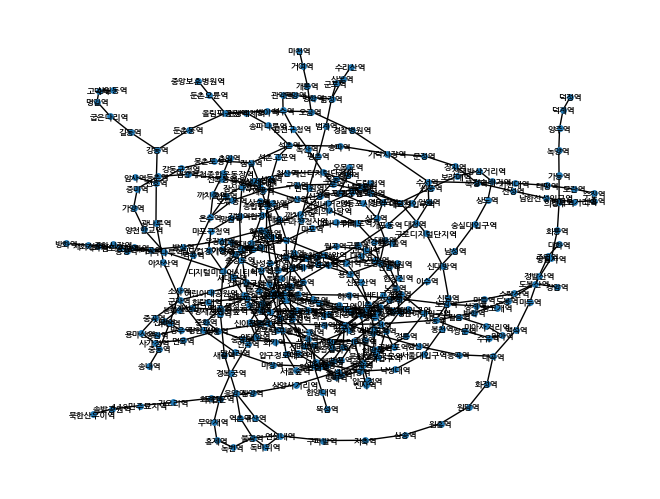

In [16]:
pos = nx.spring_layout(graph, seed=1234)

labels = nx.get_node_attributes(graph, 'name')
nx.draw(graph, pos, node_size=15, labels=labels, font_family='NanumGothic', font_size=6, font_weight='bold')

plt.axis('off')
plt.tight_layout()

In [17]:
# 파일 저장
node.to_csv('./node_subway.csv', index=None, encoding='cp949')
edge.to_csv('./edge_subway.csv', index=None, encoding='cp949')

In [18]:
nx.write_graphml_lxml(graph, 'subway_graph.graphml')

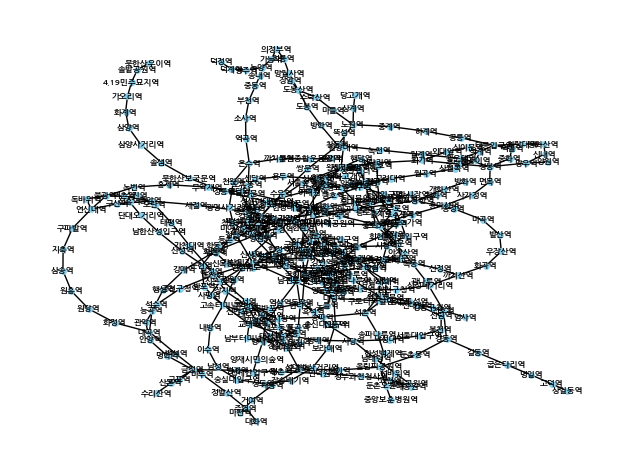

In [19]:
G = nx.from_pandas_edgelist(route, source='NameKor', target='NextName')

pos = nx.spring_layout(G, seed=12)
# pos = nx.kamada_kawai_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='skyblue')

# edges
nx.draw_networkx_edges(G, pos)

# labels
nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold', font_family='NanumGothic')

ax = plt.gca()
plt.axis('off')
plt.tight_layout()